# Assignment 3 Classification technique
Name: Amina Shaikh <br>
Roll No. 3369

Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)<br>Data
Set : https://www.kaggle.com/mohansacharya/graduate-admissions <br> <br>
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not. <br>
A. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary. <br>
B. Perform data-preparation (Train-Test Split) <br>
C. Apply Machine Learning Algorithm <br>
D. Evaluate Model. <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataFrame=pd.read_csv('Admission_Predict.csv')           #using pandas to read the data
dataFrame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
dataFrame.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [75]:
dataFrame.shape                       #tells the number of rows and columns of a given DataFrame

(400, 9)

In [7]:
dataFrame.drop('Serial No.',axis=1)   # dropping vertical axis or columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [77]:
#Applying  necessary function on "Chance of Admit"

dataFrame["Chance of Admit "]=dataFrame["Chance of Admit "].apply(lambda x: 1 if x>0.8 else 0)  #Applying lambda function

In [78]:
dataFrame["Chance of Admit "]

0      1
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [79]:
dataFrame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [80]:
# dependent and independent feature

X=dataFrame.drop("Chance of Admit ",axis=1)
Y=dataFrame["Chance of Admit "]

In [81]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [82]:
Y

0      1
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [83]:
Y.value_counts()

0    283
1    117
Name: Chance of Admit , dtype: int64

In [84]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.2, random_state=42)

#print(X_test.shape, Y_test.shape ) 
#print(X_train.shape, Y_train.shape )

print(X_train.shape, X_test.shape )

(320, 8) (80, 8)


In [85]:
# Decision Tree Classifier model 

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)        # instantiate the model 
tree.fit(X_train, Y_train)                                             # fit the model 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [86]:
#predicting the target value from the model for the samples

y_train_tree=tree.predict(X_train)
y_test_tree=tree.predict(X_test)

In [87]:
result=pd.DataFrame({'actual':Y_test, 'pred':y_test_tree})
result

,actual,pred
209,0,0
280,0,0
33,1,1
210,0,1
93,0,0
...,...,...
246,0,0
227,0,0
369,0,0
176,1,1


In [88]:
from sklearn.metrics import accuracy_score

#computing the accuracy of the model performance

acc = accuracy_score(Y_test, y_test_tree)
print('Accuracy of Descision Tree Model : ', acc)

Accuracy of Descision Tree Model :  0.95


In [89]:
from sklearn.metrics import classification_report

#computing the classification report of the model

print(classification_report(Y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.93      0.93      0.93        29

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



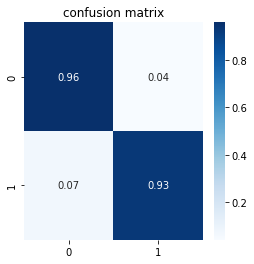

In [90]:
#visualization of Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_test_tree)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax=plt.subplots(figsize=(4,4))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')
plt.title("confusion matrix")
plt.show(block=False)

[Text(1395.0, 1426.95, 'CGPA <= 8.93\nentropy = 0.849\nsamples = 320\nvalue = [232, 88]\nclass = Non Admit'),
 Text(558.0, 1019.25, 'CGPA <= 8.435\nentropy = 0.242\nsamples = 225\nvalue = [216, 9]\nclass = Non Admit'),
 Text(279.0, 611.55, 'entropy = 0.0\nsamples = 127\nvalue = [127, 0]\nclass = Non Admit'),
 Text(837.0, 611.55, 'TOEFL Score <= 105.5\nentropy = 0.443\nsamples = 98\nvalue = [89, 9]\nclass = Non Admit'),
 Text(558.0, 203.8499999999999, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = Non Admit'),
 Text(1116.0, 203.8499999999999, 'entropy = 0.569\nsamples = 67\nvalue = [58, 9]\nclass = Non Admit'),
 Text(2232.0, 1019.25, 'GRE Score <= 328.5\nentropy = 0.654\nsamples = 95\nvalue = [16, 79]\nclass = Admit'),
 Text(1953.0, 611.55, 'GRE Score <= 318.5\nentropy = 0.925\nsamples = 47\nvalue = [16, 31]\nclass = Admit'),
 Text(1674.0, 203.8499999999999, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]\nclass = Non Admit'),
 Text(2232.0, 203.8499999999999, 'entropy = 0.811\nsam

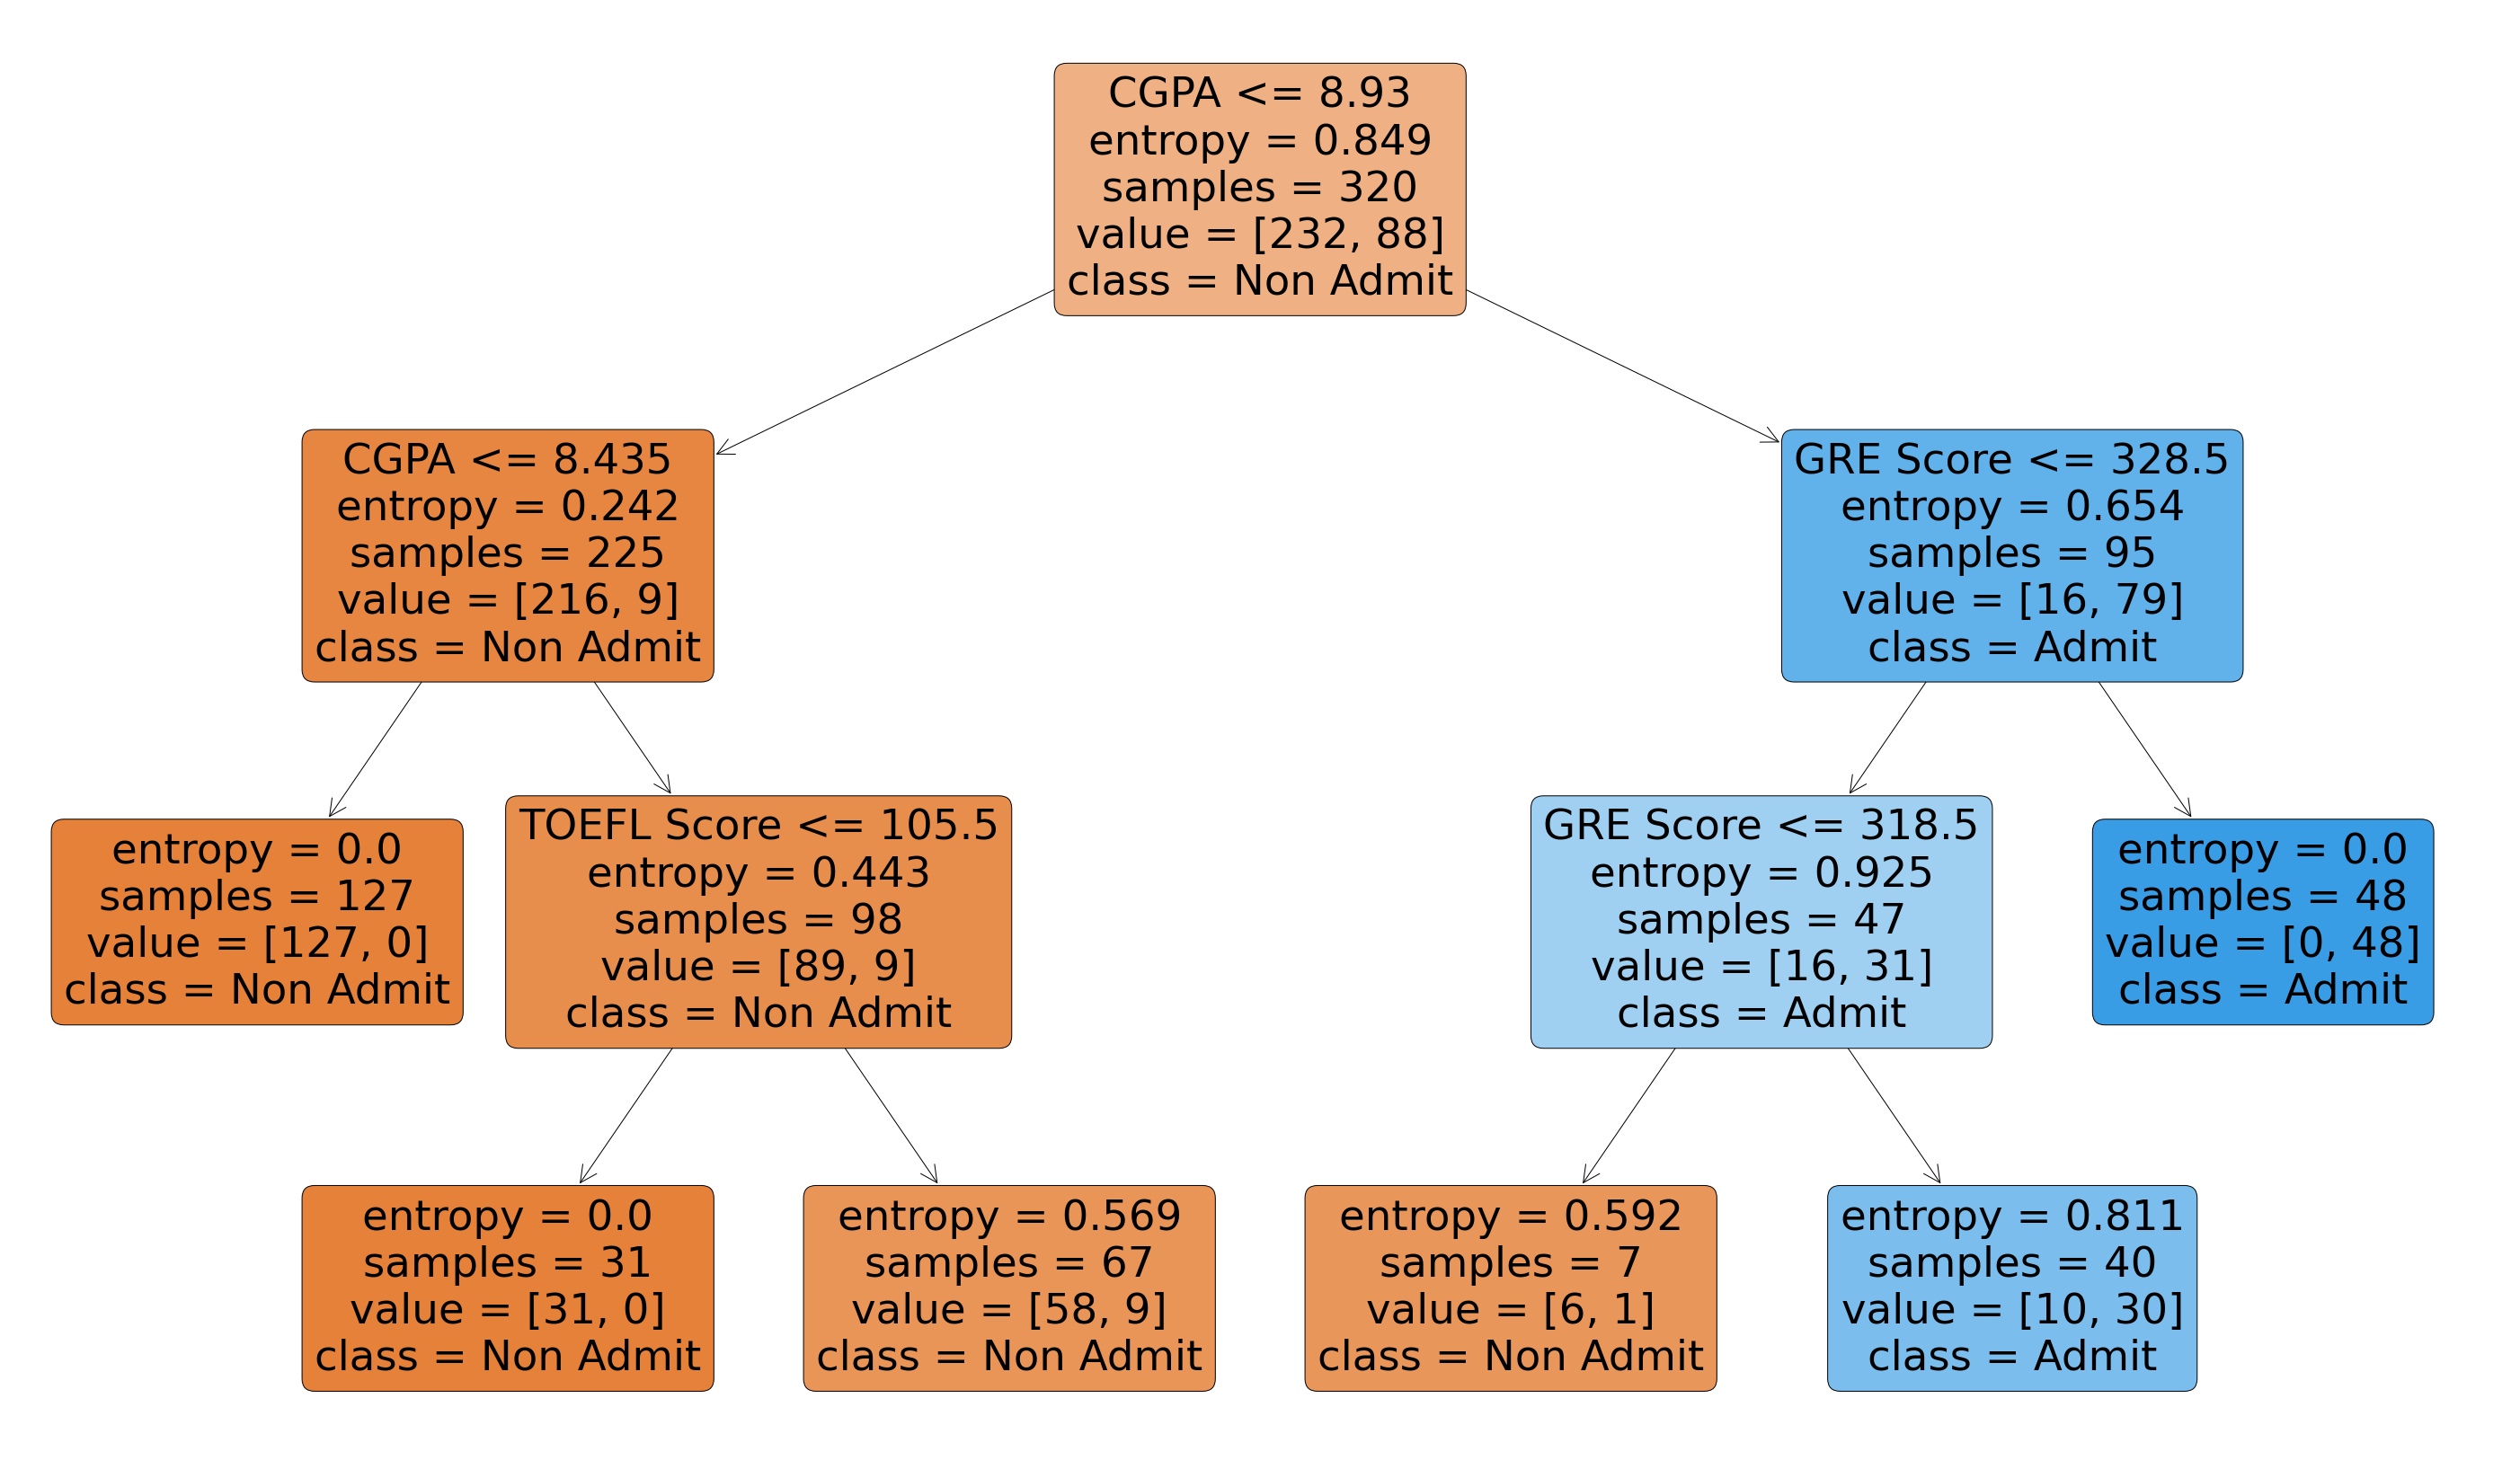

In [91]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))
plot_tree(tree,feature_names=X.columns,class_names=['Non Admit','Admit'],filled=True,rounded=True)

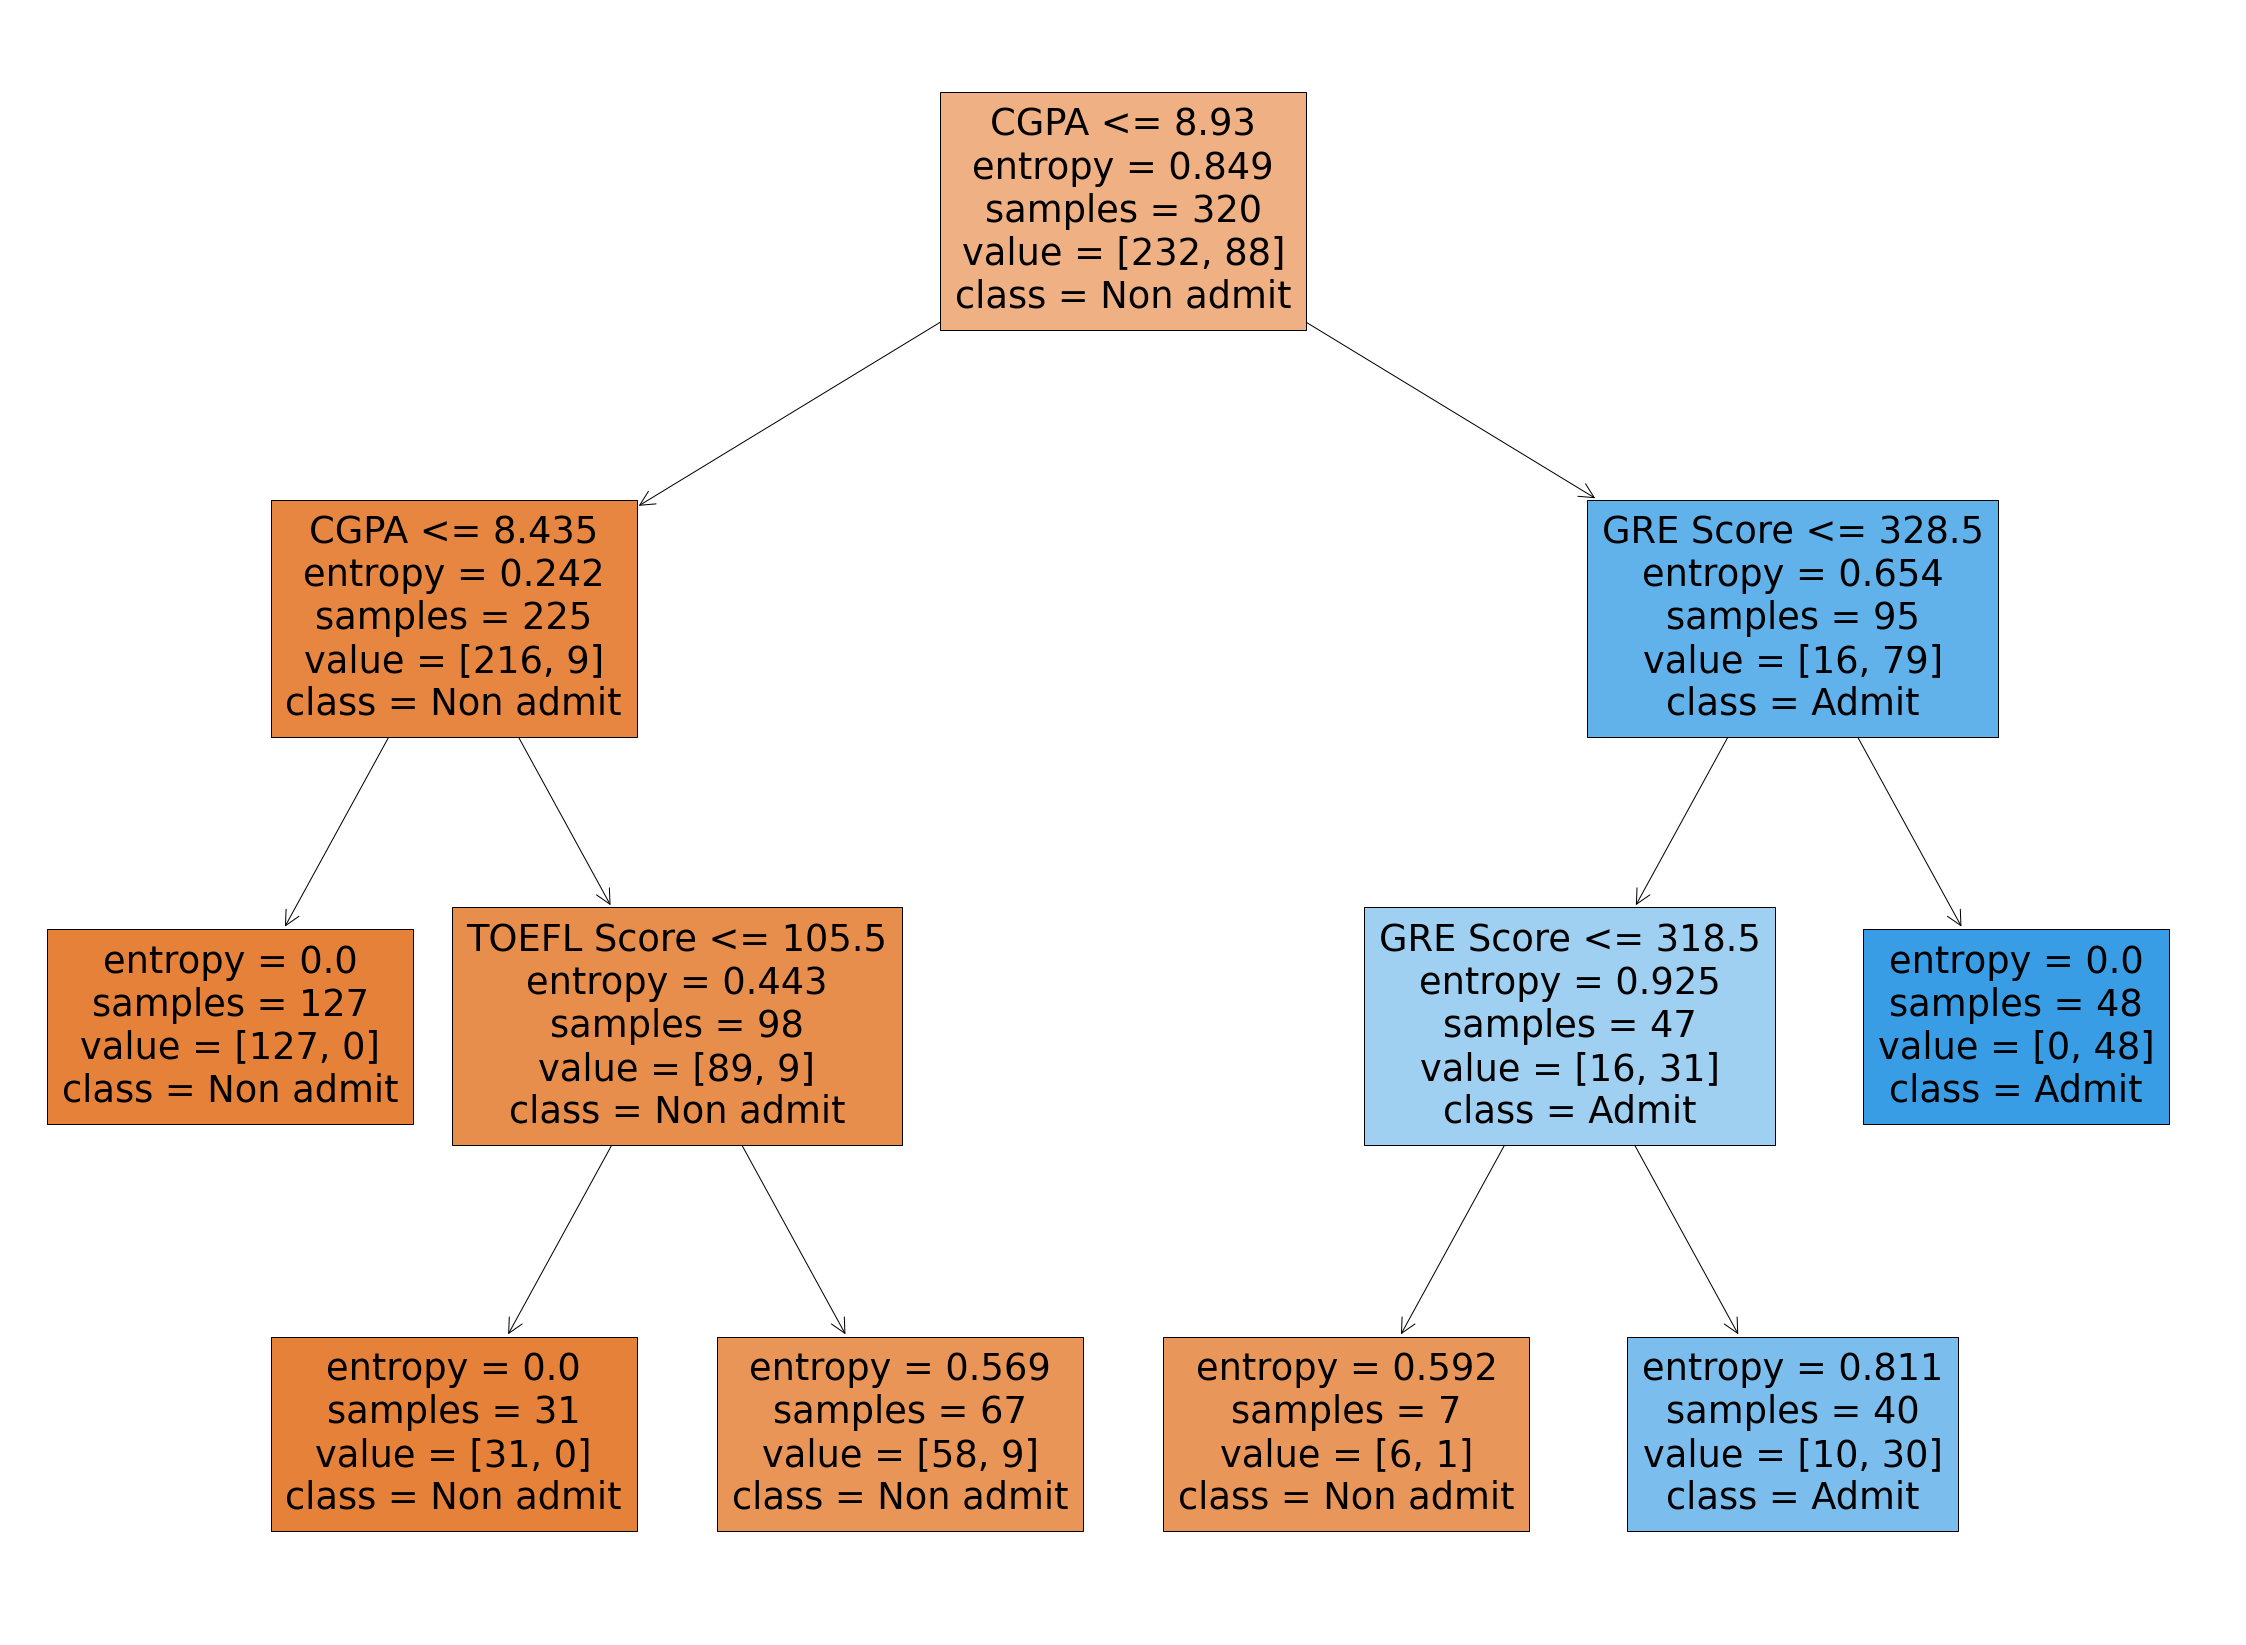

In [92]:
# visualiazation of tree

import sklearn.tree as tr
fig = plt.figure(figsize=(40,30))
_ = tr.plot_tree(tree, 
                 feature_names=X.columns,  
                 class_names=np.array(["Non admit","Admit"]),
                 filled=True)


In [93]:
#tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
#tree.fit(X_train, Y_train)

In [94]:
feature_names=dataFrame.columns[0:7]
print(feature_names,end=' ')
class_names=[str(x) for x in tree.classes_]
class_names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA'],
      dtype='object') 

['0', '1']

[Text(1395.0, 1426.95, 'CGPA <= 8.93\nentropy = 0.849\nsamples = 320\nvalue = [232, 88]\nclass = 0'),
 Text(558.0, 1019.25, 'CGPA <= 8.435\nentropy = 0.242\nsamples = 225\nvalue = [216, 9]\nclass = 0'),
 Text(279.0, 611.55, 'entropy = 0.0\nsamples = 127\nvalue = [127, 0]\nclass = 0'),
 Text(837.0, 611.55, 'TOEFL Score <= 105.5\nentropy = 0.443\nsamples = 98\nvalue = [89, 9]\nclass = 0'),
 Text(558.0, 203.8499999999999, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]\nclass = 0'),
 Text(1116.0, 203.8499999999999, 'entropy = 0.569\nsamples = 67\nvalue = [58, 9]\nclass = 0'),
 Text(2232.0, 1019.25, 'GRE Score <= 328.5\nentropy = 0.654\nsamples = 95\nvalue = [16, 79]\nclass = 1'),
 Text(1953.0, 611.55, 'GRE Score <= 318.5\nentropy = 0.925\nsamples = 47\nvalue = [16, 31]\nclass = 1'),
 Text(1674.0, 203.8499999999999, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(2232.0, 203.8499999999999, 'entropy = 0.811\nsamples = 40\nvalue = [10, 30]\nclass = 1'),
 Text(2511.0, 611.55, 

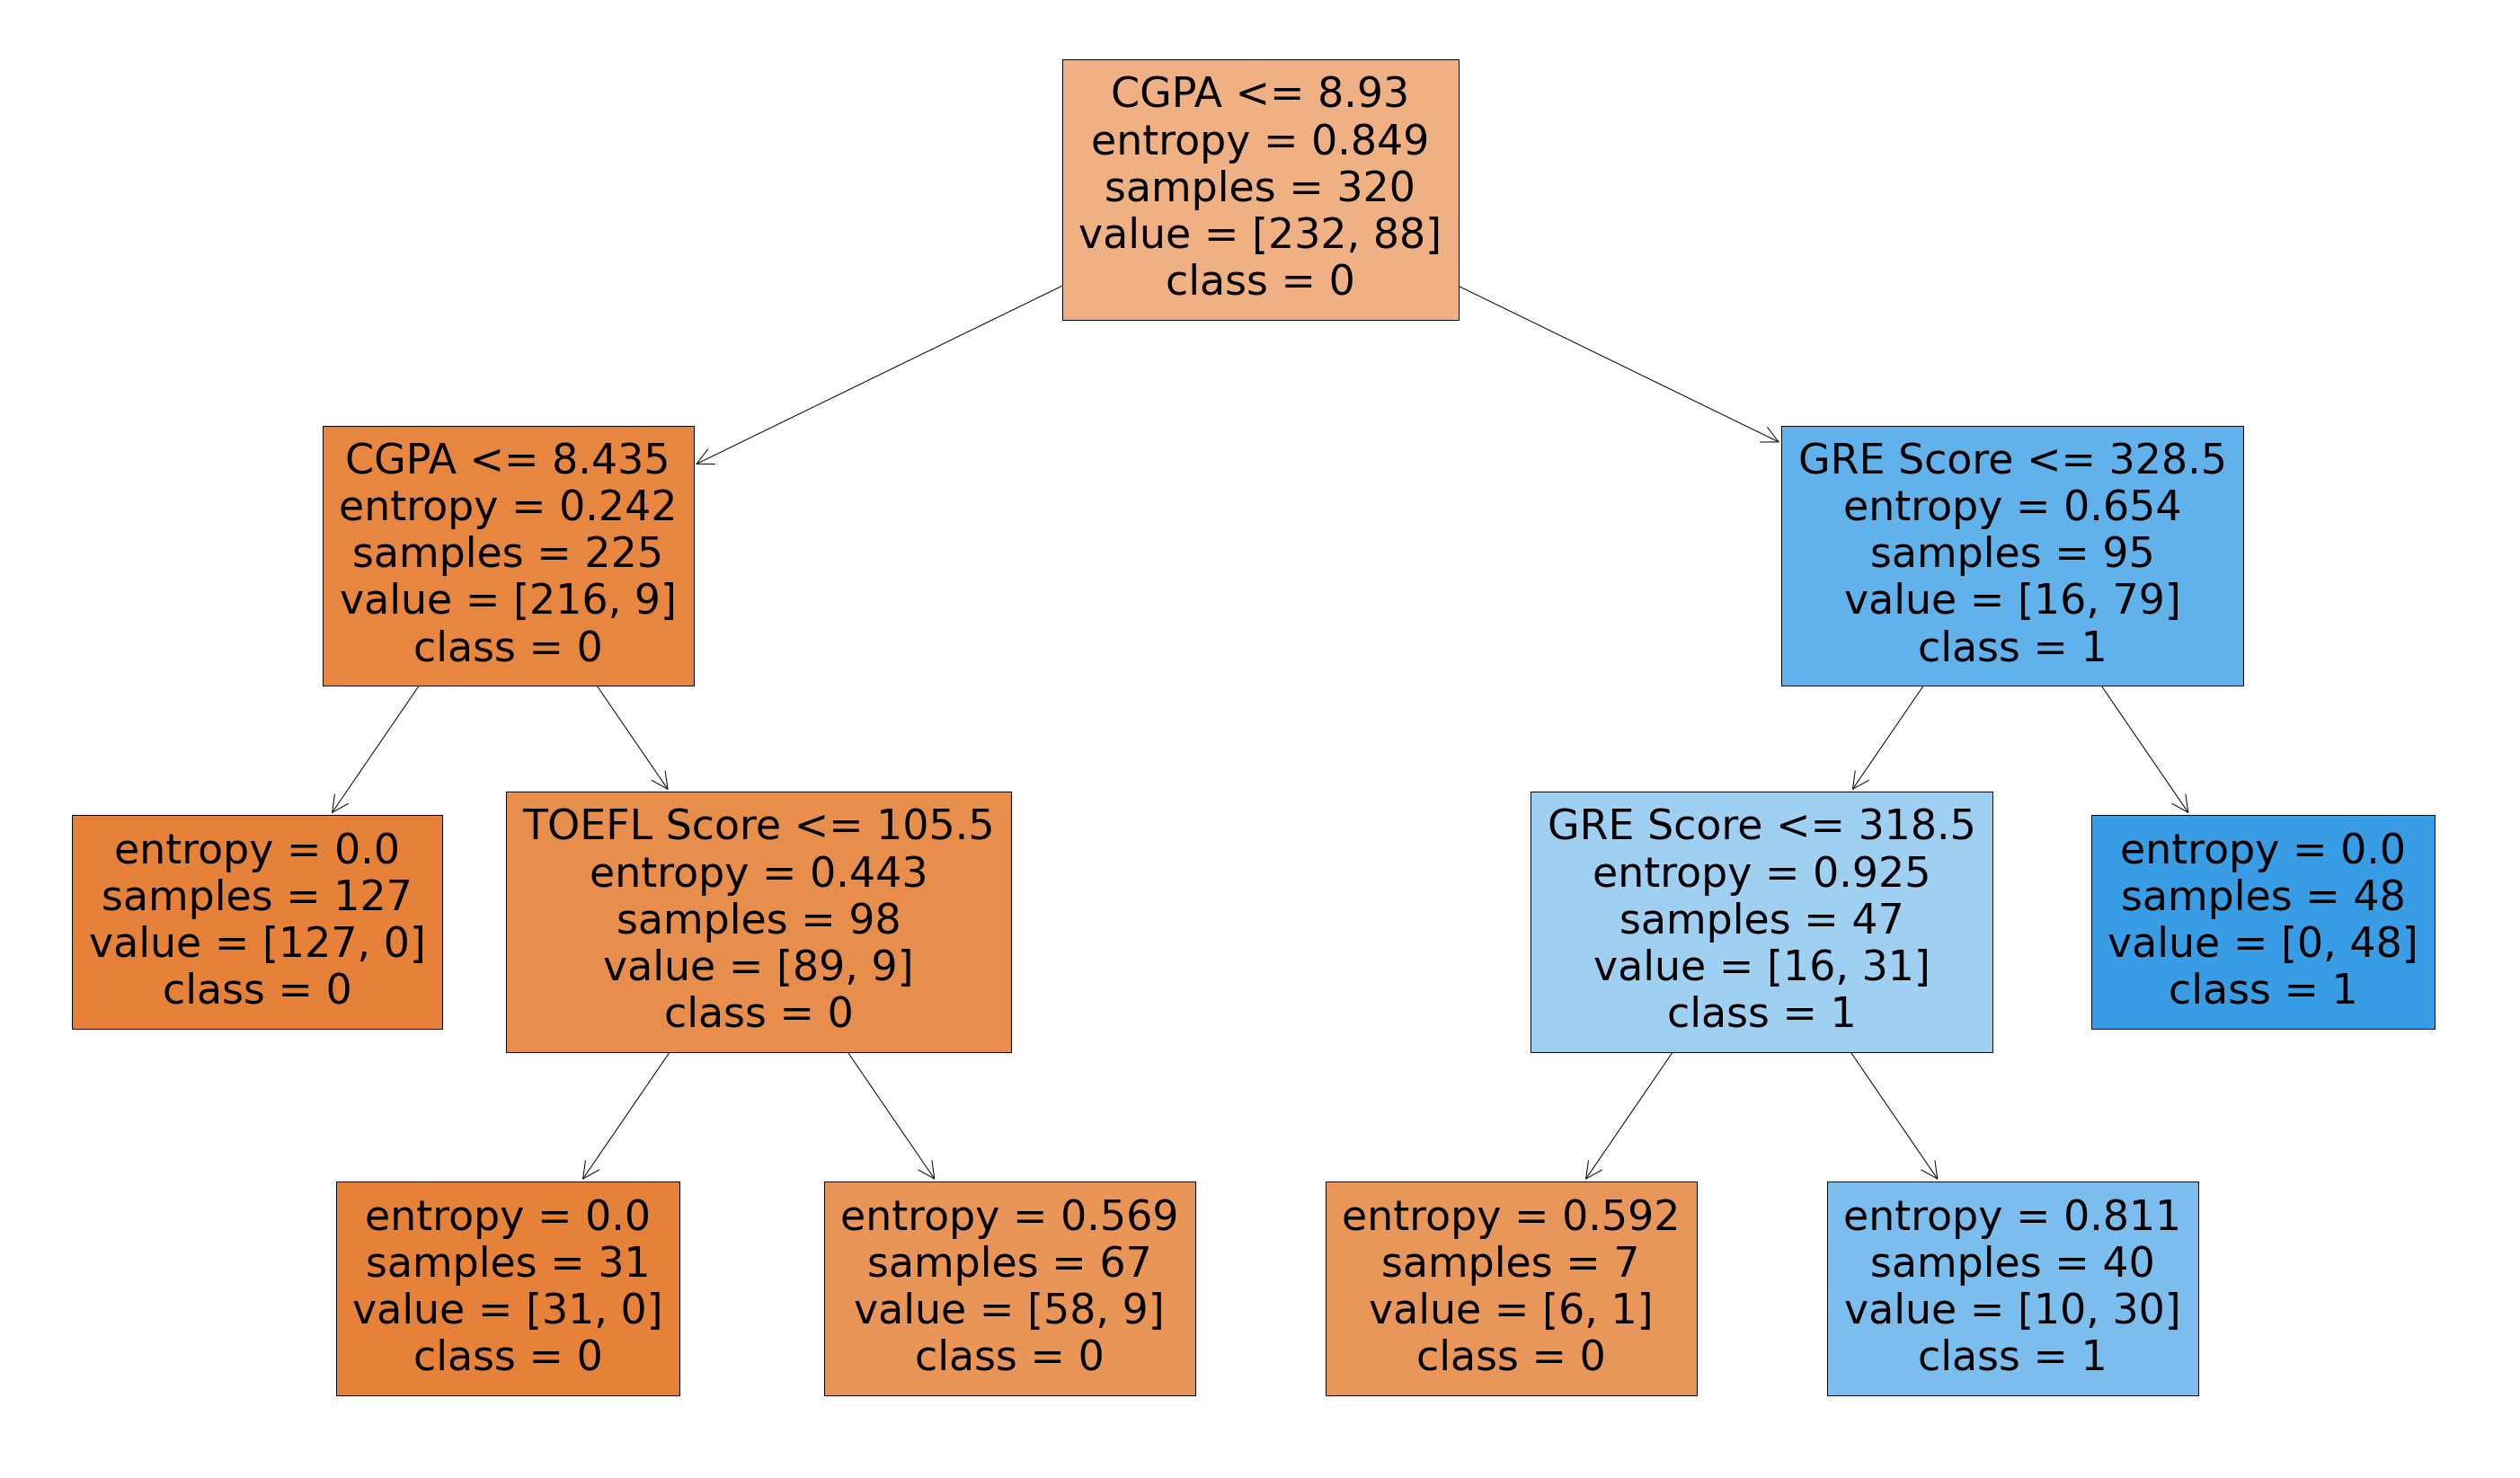

In [95]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))
plot_tree(tree,feature_names=feature_names,class_names=class_names,filled=True)